싸이킷런 공식홈페이지 참고
 
https://scikit-learn.org/stable/auto_examples/feature_selection/plot_select_from_model_diabetes.html#sphx-glr-auto-examples-feature-selection-plot-select-from-model-diabetes-py

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_diabetes
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

In [2]:
diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target

feature_names = diabetes.feature_names
print(feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


## 1.Find importance of the features
**To decide on the importance of the features we are going to use LassoCV estimator.**
The features **with the highest absolute coef_ value are considered the most important**

In [20]:
clf = LassoCV().fit(X, y)
importance = np.abs(clf.coef_) ##계수가 중요역활을 맡음
print(importance)

[  6.49684455 235.99640534 521.73854261 321.06689245 569.4426838
 302.45627915   0.         143.6995665  669.92633112  66.83430445]


# 2.Select from the model features with the higest score
Now we want to select the two features which are the most important.
  
 **SelectFromModel() allows for setting the threshold.**
 **Only the features with the coef_ higher than the threshold will remain**. 
  
 SelectFromModel은 임계값 설정해야함
   
   
 Here, we want to set the threshold slightly above the third highest coef_ calculated by LassoCV() from our data.
 
 세번째 큰 계수보다 살짝 높게 임계값 설정하겠다..

In [21]:
idx_third = importance.argsort()[-5] #여기를 바꾸면 개수 지정가능함 
threshold = importance[idx_third] + 0.01

idx_features = (-importance).argsort()[:4] #여기도 바꾸어주어야
name_features = np.array(feature_names)[idx_features]
print('Selected features: {}'.format(name_features))

Selected features: ['s5' 's1' 'bmi' 'bp']


위에서 설정한 임계값 기준으로 필요한 변수만 출력해줌

In [22]:
sfm = SelectFromModel(clf, threshold=threshold)
sfm.fit(X, y)
X_transform = sfm.transform(X)

n_features = sfm.transform(X).shape[1]

import pandas as pd
sfm_df = pd.DataFrame(X_transform, columns= name_features)
sfm_df

,s5,s1,bmi,bp
0,0.061696,0.021872,-0.044223,0.019908
1,-0.051474,-0.026328,-0.008449,-0.068330
2,0.044451,-0.005671,-0.045599,0.002864
3,-0.011595,-0.036656,0.012191,0.022692
4,-0.036385,0.021872,0.003935,-0.031991
...,...,...,...,...
437,0.019662,0.059744,-0.005697,0.031193
438,-0.015906,-0.067642,0.049341,-0.018118
439,-0.015906,0.017282,-0.037344,-0.046879
440,0.039062,0.001215,0.016318,0.044528


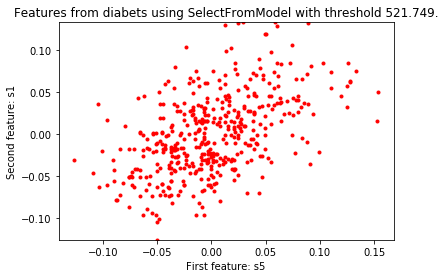

In [5]:
#top 2개만 그래프
plt.title(
    "Features from diabets using SelectFromModel with "
    "threshold %0.3f." % sfm.threshold)
feature1 = X_transform[:, 0]
feature2 = X_transform[:, 1]
plt.plot(feature1, feature2, 'r.')
plt.xlabel("First feature: {}".format(name_features[0]))
plt.ylabel("Second feature: {}".format(name_features[1]))
plt.ylim([np.min(feature2), np.max(feature2)])
plt.show()

# B. LassoLarsIC
## 위에거를 LassoLarsIC로 바꿔서 했는데 맞는지는 몰겠음..ㅜ
## 각 계수를 기반으로 뽑는게 아닐수도 있을듯 AIC BIC는
LassoLarsIC(
    criterion='aic',  ### bic로 지정가능
    
    ***************
    (criterion='aic', *, fit_intercept=True, verbose=False, normalize=True, precompute='auto', max_iter=500, eps=2.220446049250313e-16, copy_X=True, positive=False)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [17]:
from sklearn.linear_model import LassoLarsIC
clf = LassoLarsIC().fit(X, y)
importance = np.abs(clf.coef_) ##계수가 중요역활을 맡음
print(importance)

[  0.         197.75650114 522.26484702 297.15973689 103.94624877
   0.         223.92603334   0.         514.74948085  54.76768063]


In [18]:
idx_third = importance.argsort()[-5] #여기를 바꾸면 개수 지정가능함 
threshold = importance[idx_third] + 0.01

idx_features = (-importance).argsort()[:4] #여기도 바꾸어주어야
name_features = np.array(feature_names)[idx_features]
print('Selected features: {}'.format(name_features))

Selected features: ['bmi' 's5' 'bp' 's3']


In [19]:
sfm = SelectFromModel(clf, threshold=threshold)
sfm.fit(X, y)
X_transform = sfm.transform(X)

n_features = sfm.transform(X).shape[1]

import pandas as pd
sfm_df = pd.DataFrame(X_transform, columns= name_features)
sfm_df

,bmi,s5,bp,s3
0,0.061696,0.021872,-0.043401,0.019908
1,-0.051474,-0.026328,0.074412,-0.068330
2,0.044451,-0.005671,-0.032356,0.002864
3,-0.011595,-0.036656,-0.036038,0.022692
4,-0.036385,0.021872,0.008142,-0.031991
...,...,...,...,...
437,0.019662,0.059744,-0.028674,0.031193
438,-0.015906,-0.067642,-0.028674,-0.018118
439,-0.015906,0.017282,-0.024993,-0.046879
440,0.039062,0.001215,-0.028674,0.044528


## 위랑 s3빼곤 같음
위 LassoCV = 
Selected features: ['s5' 's1' 'bmi' 'bp']

B. LassoLarsIC
Selected features: ['bmi' 's5' 'bp' 's3']

## 나름의 결론
LassoCV는 회귀식의 계수로 선택하는것 같고
 
LassoLarsIC는 AIC, BIC 기반으로 변수선택하는것 같음(확실X)
 
(변수선택법서도 AIC가 최소가 되게끔 했었던듯?) 

# 밑은 싸이킷런 공식 LassoLarsIC 코드

In [23]:
from sklearn import linear_model
reg = linear_model.LassoLarsIC(criterion='bic')
reg.fit([[-1, 1], [0, 0], [1, 1]], [-1.1111, 0, -1.1111])
LassoLarsIC(criterion='bic')
print(reg.coef_)


[ 0.     -1.1111]


* coef_ :array-like of shape (n_features,)
parameter vector (w in the formulation formula)

* intercept_ : float
independent term in decision function.

* alpha_:float
the alpha parameter chosen by the information criterion

* n_iter_:int
number of iterations run by lars_path to find the grid of alphas.

* criterion_ :array-like of shape (n_alphas,)
 
The value of the information criteria (‘aic’, ‘bic’) across all alphas. The alpha which has the smallest information criterion is chosen. This value is larger by a factor of n_samples compared to Eqns. 2.15 and 2.16 in (Zou et al, 2007).